Creator: Christopher Marrero

Capstone Project 2022 Data Analytics Class      
Title: NY Chemical Dependence Treatment Admissions for age 55 and older


To create awareness on the substance abuse crisis which is demolishing our older population, there is a stigma between substance abuse and the younger population. My goal with this analysis is to provide information that shows that substance abuse is an issue amongst not only young adults but also individuals that are 55 years or older. Hopefully, this data can motivate groups to spend time in the NYC area and advocate for early  substance abuse prevention. 


Questions that i would like to asnwer.     
1.Which are the top 2 substances causing the Admissions ?        
2.Which were the years with the most and least admissions ?      
3.Which county has the most and least  admissions ?       
4.How are the Admissions distributed amongst Males/Females ?      
5.What are the type of facilities receiving the admissions ?     


In [1]:
#Code to expand the margin of the Jupyter Notebook. This allows for better viewing of code. 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Python Library imports to complete the data analysis. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from IPython.display import display_html 

In [3]:
#Source - catalog.data.gov
# Title - Chemical Dependence Treatment Program Admissions for 55 and Older: Beginning 2007

dataset= pd.read_csv ('https://data.ny.gov/api/views/5xvm-4zc6/rows.csv')

In [5]:
# code to review Data Frame at a glance and understand basic data column/row composition in order to understand how to approach the Analysis

dataset.head()

,Year,County of Residence,Gender,Program Category,Service Type,Primary Substance Group,Admissions
0,2007,Albany,Female,Crisis,Medical Managed Detoxification,Heroin,4
1,2007,Albany,Female,Crisis,Medical Managed Detoxification,Alcohol,31
2,2007,Albany,Female,Crisis,Medically Monitored Withdrawal,Alcohol,3
3,2007,Albany,Female,Crisis,Med Sup Withdrawal - Inpatient,Cocaine incl Crack,1
4,2007,Albany,Female,Crisis,Med Sup Withdrawal - Inpatient,Alcohol,2


In [6]:
#code to retrieve the data type of each column and select the type of aggregation. Also, to understand if the is Null values on the data.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     26083 non-null  int64 
 1   County of Residence      26083 non-null  object
 2   Gender                   26083 non-null  object
 3   Program Category         26083 non-null  object
 4   Service Type             26083 non-null  object
 5   Primary Substance Group  26083 non-null  object
 6   Admissions               26083 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [7]:
#code to run a quick statistical analysis on the data. 

dataset.describe()

,Year,Admissions
count,26083.000000,26083.000000
mean,2014.022160,15.854005
std,3.984496,56.148781
min,2007.000000,1.000000
25%,2011.000000,1.000000
50%,2014.000000,3.000000
75%,2018.000000,8.000000
max,2020.000000,1279.000000


In [8]:
#code to drop column 'Service Type' from the data frame since it will not be used on the analysis. 

dataset.drop('Service Type', axis=1, inplace=True)

In [9]:
#code to turn the column 'Year' to a string since no aggregation is needed on this column and would need it to be discrete for better data analysis. Per dataset.decribe() it is being read as an integer.

dataset['Year'] = dataset["Year"].apply(str)

In [10]:
# Code to get a list of all available counties in the data frame
# According to the .Value_Counts () - there is a total of 62 counties on the dataset. The focus of the analysis will be based on the 5 NYC Counties (Brooklyn, Bronx, Manhattan, Queens & Staten Island).

dataset['County of Residence'].value_counts()

New York       1416
Bronx          1265
Kings          1259
Queens         1184
Westchester     985
               ... 
Wyoming         100
Yates            94
Lewis            78
Schuyler         73
Hamilton         34
Name: County of Residence, Length: 62, dtype: int64

In [12]:
#Code to rename counties. The dataset provides the formal name of the counties. This replace will allow me to update the name to their more known names. 

dataset['County of Residence'].replace({'New York':'Manhattan'}, inplace = True)
dataset['County of Residence'].replace({'Kings':'Brooklyn'}, inplace = True)
dataset['County of Residence'].replace({'Richmond':'Staten Island'}, inplace = True)

In [13]:
#Code to determine the type of substances causing the admissions in the facilities. 

dataset['Primary Substance Group'].value_counts()

Alcohol                   8938
Heroin                    5066
Cocaine incl Crack        4021
Other Opioids             3986
All Others                2174
Marijuana incl Hashish    1898
Name: Primary Substance Group, dtype: int64

In [14]:
#Code to clean up the names of the Substances to a more cleaner format. 

dataset['Primary Substance Group'].replace({'Cocaine incl Crack':'Cocaine/Crack'}, inplace = True)
dataset['Primary Substance Group'].replace({'Other Opioids':'Opioids'}, inplace = True)
dataset['Primary Substance Group'].replace({'Marijuana incl Hashish':'Marijuana'}, inplace = True)
dataset['Primary Substance Group'].replace({'All Others':'Other'}, inplace = True)

In [15]:
#Code to create a list of  the New York City 5 counties that will be composing the analysis.

searchfor = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']

In [16]:
#Code to exclude all other counties from the data frame and only keep the ones declared on the 'Search For' list. this would allow for the analysis to focus on the 5 counties which is part of the Healthfirst network. 

dataset1 = dataset[dataset['County of Residence'].str.contains('|'.join(searchfor))]

     Admissions                  
           mean    sum amin  amax
Year                             
2007  30.762402  11782    1   789
2008  31.500000  12348    1   745
2009  33.733831  13561    1   762
2010  37.015748  14103    1   831
2011  38.210396  15437    1   951
2012  39.632212  16487    1   998
2013  39.601918  16514    1   898
2014  40.861502  17407    1   998
2015  41.495392  18009    1   827
2016  44.621429  18741    1   771
2017  43.287846  20302    1   770
2018  47.400000  23226    1  1279
2019  52.800847  24922    1  1113
2020  41.616253  18436    1   799


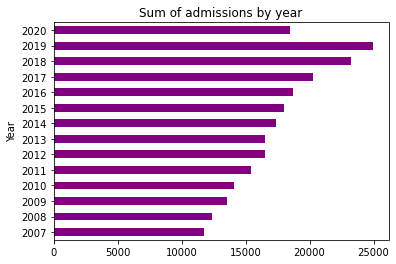

In [18]:
#Code to run a statical analysis on the Admission by Year to answer question 2 (Which were the years with the most and least admissions ?)  also to see the YoY trend of admissions over the course of 14 Years. 

#Below data shows that 2007 is the year with least admissions & 2019 sustained the highest admissions. also the trend shows a steady growth of admissions into Substance abuse facilities. 

tableyear = dataset1.groupby(['Year']).agg({'Admissions':[np.mean, np.sum, np.min, np.max]})
dataset1.groupby(['Year'])['Admissions'].sum().plot.barh(width=0.5,color=['purple'],title='Sum of admissions by year')
print(tableyear)

                    Admissions                  
                          mean    sum amin  amax
County of Residence                             
Bronx                46.899605  59328    1   906
Brooklyn             46.885624  59029    1  1011
Manhattan            53.103107  75194    1  1279
Queens               29.599662  35046    1   561
Staten Island        15.367273  12678    1   457


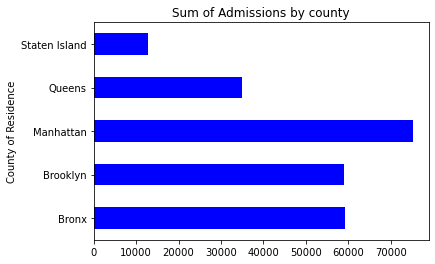

In [19]:
#Code to run a statical analysis on the admissions by counties to answer question 3. (Which county has the most and least admissions ?). 

#Below data shows that Manhattan has the highest  admission ( 75,194 ) of all the counties. Staten Island has the least admissions (12,678).

tablecounty = dataset1.groupby(['County of Residence']).agg({'Admissions':[np.mean, np.sum, np.min, np.max]})
dataset1.groupby(['County of Residence'])['Admissions'].sum().plot.barh(width=0.5,color=['blue'],title='Sum of Admissions by county')
print(tablecounty)

       Admissions                   
             mean     sum amin  amax
Gender                              
Female  18.356120   44844    1   330
Male    56.027096  196431    1  1279


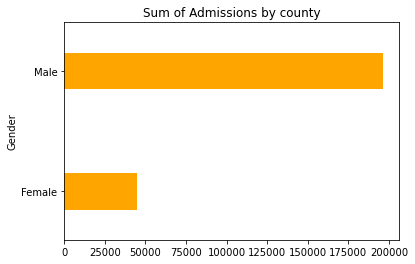

In [20]:
#Code to run a statical analysis on the admissions by Gender to answer question 4.( How are the Admissions distributed amongst Males/Females ?)

# Below data shows that Females have the least amount of admissions at (44,844 ). Males have the most admissions at a total of (196,431 ) 
#This large difference opens the door to a future analysis of why is the Gender admission distribution so one sided. 

tablegender = dataset1.groupby(['Gender']).agg({'Admissions':[np.mean, np.sum, np.min, np.max]})
dataset1.groupby(['Gender'])['Admissions'].sum().plot.barh(width=0.3,color=['orange'],title='Sum of Admissions by county')
print(tablegender)


                         Admissions                   
                               mean     sum amin  amax
Primary Substance Group                               
Alcohol                  108.049180  138411    1  1279
Cocaine/Crack             21.636542   22026    1   257
Heroin                    42.098833   61338    1   665
Marijuana                  8.987589    5069    1   118
Opioids                    4.262557    3734    1    26
Other                     14.205843   10697    1   197


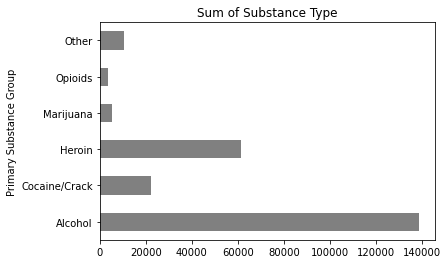

In [21]:
#Code to run a statical analysis on the admissions by substance  to answer question 1.( Which are the top 2 substances causing the Admissions ?)

# Below data shows that Alcohol (138,411) & Heroin (61,338)  are the top 2 leading substances of the course of 14 Years. 

tabletype = dataset1.groupby(['Primary Substance Group']).agg({'Admissions':[np.mean, np.sum, np.min, np.max]})
dataset1.groupby(['Primary Substance Group'])['Admissions'].sum().plot.barh(width=0.5,color=['gray'],title='Sum of Substance Type')
print(tabletype)

                         Admissions                   
                               mean     sum amin  amax
Program Category                                      
Crisis                    50.993920  109025    1  1279
Inpatient                 46.155039   35724    1   817
Opioid Treatment Program  48.307851   23381    1   665
Outpatient                49.391543   63073    1   604
Residential                8.350420    9937    1    89
Specialized                1.569767     135    1     5


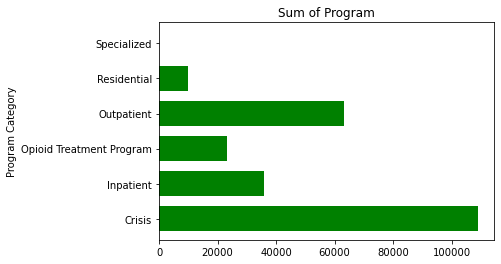

In [22]:
#Code to run a statical analysis on the admissions by Facility type  to answer question 5. (What are the type of facilities receiving the admissions ?) 

# Below data shows that there are 6 different types of facilities receiving the admissions. Crisis Facilities receive the most admissions at (109,025)

tablecategory = dataset1.groupby(['Program Category']).agg({'Admissions':[np.mean, np.sum, np.min, np.max]})
dataset1.groupby(['Program Category'])['Admissions'].sum().plot.barh(width=0.7,color=['green'],title='Sum of Program')
print(tablecategory)

In [23]:
#Code below to understand how admission is distributed by Substance, County and gender. 

dataset1.groupby(['Primary Substance Group','County of Residence','Gender']).agg({'Admissions':[np.mean, np.sum, np.max]})

Admissions             
                                                          mean    sum  amax
Primary Substance Group County of Residence Gender                         
Alcohol                 Bronx               Female   43.556522   5009   177
                                            Male    177.794521  25958   906
                        Brooklyn            Female   38.737705   4726   141
                                            Male    184.075862  26691  1011
                        Manhattan           Female   43.204545   5703   158
                                            Male    264.523490  39414  1279
                        Queens              Female   44.765217   5148   330
                                            Male    112.047619  16471   561
                        Staten Island       Female   15.829787   1488    62
                                            Male     67.267241   7803   457
Cocaine/Crack           Bronx               Female   15.494737   1472    83
                                            Male     32.880597   4406   243
                        Brooklyn            Female   13.206186   1281    65
                                            Male     32.891473   4243   189
                        Manhattan           Female   12.876190   1352    60
                                            Male     45.503546   6416   257
                        Queens              Female    6.000000    498    30
                                            Male     14.900826   1803   104
                        Staten Island       Female    3.351351    124    11
                                            Male      5.671053    431    26
Heroin                  Bronx               Female   26.580882   3615   191
                                            Male     86.324324  15970   665
                        Brooklyn            Female   19.236220   2443   145
                                            Male     72.010695  13466   498
                        Manhattan           Female   19.181818   2743   140
                                            Male     77.609137  15289   447
                        Queens              Female    9.990291   1029    58
                                            Male     28.412429   5029   199
                        Staten Island       Female    4.151899    328    16
                                            Male     11.593496   1426    59
Marijuana               Bronx               Female    6.315789    240    23
                                            Male     11.589474   1101   102
                        Brooklyn            Female    4.550000    182    16
                                            Male     13.617978   1212   118
                        Manhattan           Female    4.928571    207    17
                                            Male     11.956140   1363    91
                        Queens              Female    3.958333     95    13
                                            Male      6.802632    517    47
                        Staten Island       Female    1.642857     23     4
                                            Male      4.031250    129    11
Opioids                 Bronx               Female    2.649351    204     9
                                            Male      4.868687    482    16
                        Brooklyn            Female    3.063291    242    13
                                            Male      6.408602    596    26
                        Manhattan           Female    3.780220    344    13
                                            Male      5.729730    636    20
                        Queens              Female    3.109589    227    14
                                            Male      4.448598    476    17
                        Staten Island       Female    2.761905    174    14
                                            Male      4.253012    353    19
Other                   

#Conclusion       
The analysis determined that our 55 or older population in NYC is undergoing substance abuse issues. With Alcohol (138,411) and Heroin (61,338)  being the top 2 leading substances. Over the course of 14 years, Manhattan is the county with the highest total admissions of 37.17% - 75,194. Unfortunately, 45.19%  - 709,025 of all admissions are at a crisis/potential overdose state. 2007 was the year with the least admissions at 11,782 & 2019 sustained the highest amount of admissions at 24,922. 

One of the biggest take away from the analysis is the large difference between Male/Female admissions. The Male population is > 80% of all admissions. This also opens the door to a study of why the large gap between the genders. 
 
Hopefully, data like this can initiate programs that can assist the prevention of Substance abuse cases within NYC. This would be in the interest of insurance companies such as Health First since although we offer benefits to our Medicare members preventing these admissions can assist with long term cost sustained by the company since overdose and/or sustained usage of this drugs can lead to long term effects and health complications


In [ ]:
#Code to Extract the Cleaned up data and load into a visualtion tool such as Tableau to create a dynamic dashboard. 

dataset1.to_excel(r'C:\Users\CMarrero\OneDrive - Healthfirst\Desktop\Capstone\CapstoneExtract.xlsx', index = False)